In [135]:
import os
import numpy as np
import pandas as pd
import matplotlib

In [136]:
# Data Files Locations

file_loc_train = "data_miccai/train"
file_loc_test = "data_miccai/test"
file_loc_val = "data_miccai/val"

In [137]:
# list of all the folders in the train location 
list_of_dir  = os.listdir(file_loc_train)

print("Total folders :", len(list_of_dir))

Total folders : 1000


In [138]:
# This function will find the average of the values in a column.
# It will skip the cell with value zero "0".

def blood_data_avg(pd_data):
    row,column = pd_data.shape
    
    arr_val = [0]*column
    
    for i in range(column):
        sm = 0
        cnt = 0
        for j in range(row):
            if pd_data.iloc[j,i] != 0:
                sm += pd_data.iloc[j,i]
                cnt+=1
        arr_val[i] = sm/cnt
    return arr_val


def radiology_data_avg(pd_data):
    row,column = pd_data.shape
    
    arr_val = [0]*column
    
    for i in range(column):
        sm = 0
        cnt=0
        if i==0:
            for j in range(row):
                if pd_data.iloc[j,i] != 0:
                    sm += pd_data.iloc[j,i]
                    cnt+=1
            arr_val[i] = sm/(cnt*1.0)
        else:
            for j in range(row):
                if(pd_data.iloc[j,i] == True):
                    sm+=1
                cnt+=1
            if(sm>=(cnt/2.0)):
                arr_val[i]=1
    return arr_val

def temperature_data_avg(pd_data):
    row,column = pd_data.shape
    
    arr_val = [0]*column
    
    for i in range(column):
        sm = 0
        cnt = 0
        for j in range(row):
            if pd_data.iloc[j,i] != 0:
                sm += pd_data.iloc[j,i]
                cnt+=1
        arr_val[i] = sm/cnt
    return arr_val

def outcome_data_avg(pd_data):
    row,column = pd_data.shape
    
    output = 0
    for i in range(1,column):
        if pd_data.iloc[0,i] == 1:
            output += 2**(i-1)
    return output
    

In [139]:
output_combined_file_loc = "output/data_blood_radiology_temperature_train.csv"
Y_file_loc = "output/Y_blood_radiology_temperature_train.csv"

output_combined = []
Y = []

for i in list_of_dir:
    cd_list_of_dir = file_loc_train+"/"+i
    
    file_read_blood = pd.read_csv(cd_list_of_dir+"/data_bloodvalues.csv", sep=",")
    file_read_radiology = pd.read_csv(cd_list_of_dir+"/data_radiology.csv", sep=",")
    file_read_temperature = pd.read_csv(cd_list_of_dir+"/data_temperature.csv", sep=",")
    
    file_read_outcome = pd.read_csv(cd_list_of_dir+"/outcome.csv", sep=",")
    Y.append(outcome_data_avg(file_read_outcome))
    
    output_combined.append(blood_data_avg(file_read_blood)[1:] + radiology_data_avg(file_read_radiology)[1:] + temperature_data_avg(file_read_temperature)[1:])

In [140]:
output_data_combined_pd = pd.DataFrame(output_combined)
output_data_combined_pd.to_csv(output_combined_file_loc, sep=',', index=False)

Y_pd = pd.DataFrame(Y)
Y_pd.to_csv(Y_file_loc, sep=',', index=False)

In [141]:
# Training XGBoost
X_train = output_data_combined_pd
y_train = Y_pd

y_train = y_train.values.ravel()
y_train

array([0, 4, 0, 5, 4, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4,
       0, 4, 0, 0, 1, 4, 0, 5, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1,
       0, 0, 0, 0, 0, 4, 5, 4, 4, 4, 4, 0, 1, 0, 0, 1, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 4, 0, 5, 0, 0, 0, 1, 5, 0, 1, 0, 4, 1, 0, 2,
       0, 0, 4, 1, 0, 0, 4, 0, 0, 4, 4, 1, 0, 0, 0, 4, 0, 1, 0, 0, 5, 0,
       4, 4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 5, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 4,
       5, 0, 5, 4, 0, 4, 5, 0, 4, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 0, 1, 0, 4, 0, 4, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0,
       1, 0, 4, 0, 4, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 6, 4,
       0, 0, 0, 1, 0, 1, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 4, 0, 1,
       0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 4, 0, 0, 0, 0,
       0, 4, 4, 0, 0, 6, 0, 0, 5, 0, 0, 1, 1, 4, 0,

In [142]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,39.778708,2.383207,0.146966,1.256070,7.402310,6.263414,1.823022,20.163977,0.815060,138.584300,...,143.081095,0,0,0,0,0,0,1,1,36.363661
1,38.723290,2.391897,0.139690,1.191934,7.078920,6.579387,1.841766,20.098168,0.804294,139.499970,...,151.586421,0,0,0,0,0,0,1,0,35.922675
2,38.673106,2.389367,0.209004,1.395949,8.793075,6.324314,1.856180,19.952379,0.789322,139.435324,...,179.813346,0,0,0,0,0,0,0,0,35.894675
3,38.088328,2.380146,0.196316,1.466359,7.947355,6.762181,1.857770,20.129699,0.798831,139.172284,...,168.607291,0,0,1,1,0,0,0,0,36.274358
4,39.007237,2.359427,0.138419,1.372929,7.329894,6.586379,1.848849,20.246647,0.790988,139.253915,...,120.912325,0,0,0,0,0,0,0,0,36.075976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,37.794382,2.389603,0.133704,1.381213,7.707765,6.401327,1.843430,20.127811,0.808562,139.410628,...,129.529877,0,0,0,0,0,0,0,0,36.365631
996,40.529631,2.384012,0.135887,1.206635,7.643725,6.565184,1.885611,20.339260,0.756491,139.303129,...,137.583573,0,0,0,0,0,0,0,0,35.957710
997,39.444720,2.317172,0.165007,1.374977,7.818171,7.006581,1.843279,20.208237,0.801208,139.815971,...,138.519927,0,0,0,0,0,0,0,0,35.685314
998,39.031849,2.391840,0.170812,1.556072,7.611231,6.384736,1.840933,20.137504,0.803704,139.340819,...,153.792743,0,0,0,0,1,0,0,0,35.781543


In [143]:
# list of all the folders in the train location 
list_of_dir  = os.listdir(file_loc_test)

print("Total folders :", len(list_of_dir))

Total folders : 250


In [144]:
output_combined_file_loc = "output/data_blood_radiology_temperature_test.csv"
Y_file_loc = "output/Y_blood_radiology_temperature_test.csv"

output_combined = []
Y = []

for i in list_of_dir:
    cd_list_of_dir = file_loc_test+"/"+i
    
    file_read_blood = pd.read_csv(cd_list_of_dir+"/data_bloodvalues.csv", sep=",")
    file_read_radiology = pd.read_csv(cd_list_of_dir+"/data_radiology.csv", sep=",")
    file_read_temperature = pd.read_csv(cd_list_of_dir+"/data_temperature.csv", sep=",")
    
    file_read_outcome = pd.read_csv(cd_list_of_dir+"/outcome.csv", sep=",")
    Y.append(outcome_data_avg(file_read_outcome))
    
    output_combined.append(blood_data_avg(file_read_blood)[1:] + radiology_data_avg(file_read_radiology)[1:] + temperature_data_avg(file_read_temperature)[1:])

In [145]:
output_data_combined_pd = pd.DataFrame(output_combined)
output_data_combined_pd.to_csv(output_combined_file_loc, sep=',', index=False)

Y_pd = pd.DataFrame(Y)
Y_pd.to_csv(Y_file_loc, sep=',', index=False)

In [146]:
# Training XGBoost
X_test = output_data_combined_pd
y_test = Y_pd

In [148]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,38.575627,2.373679,0.166467,1.113710,7.976120,6.650959,1.841192,20.041468,0.798417,139.300861,...,179.312710,0,0,0,0,0,0,0,0,36.043067
1,38.111074,2.394380,0.195598,1.315930,8.006824,6.245896,1.821652,20.123454,0.796693,139.083119,...,142.091179,0,0,0,0,0,0,0,0,35.928197
2,38.908162,2.383404,0.172782,1.293778,7.905876,6.583486,1.823505,20.145762,0.794715,138.449389,...,144.484255,0,0,0,1,0,0,0,0,35.873671
3,39.286266,2.402991,0.173493,1.398051,8.294170,6.348994,1.823610,20.123098,0.774846,140.510403,...,147.802536,0,0,0,0,1,0,0,0,35.916384
4,39.743723,2.350581,0.130787,1.332426,9.523615,6.940227,1.843510,20.065433,0.785053,138.965295,...,138.808215,0,0,0,0,0,0,0,0,36.137421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,38.621038,2.381674,0.134209,1.331317,7.760494,6.561799,1.871055,20.174576,0.801036,139.653895,...,157.504313,1,0,0,0,0,0,0,0,36.133774
246,38.016004,2.388672,0.165773,1.313820,7.306246,6.715317,1.809995,20.042229,0.799734,139.435965,...,146.443286,0,1,0,0,0,0,0,0,35.771615
247,40.038095,2.371142,0.314627,1.373437,7.323847,6.631080,1.847206,20.279568,0.816263,140.383955,...,185.733260,0,0,0,0,0,0,0,0,36.096026
248,38.109520,2.394507,0.133595,1.385845,8.145748,6.611329,1.861051,20.110691,0.800799,139.830583,...,125.901940,1,0,0,0,0,0,0,0,36.324914


In [147]:
frames = [X_train, X_test]
result = pd.concat(frames)

In [149]:
result

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,39.778708,2.383207,0.146966,1.256070,7.402310,6.263414,1.823022,20.163977,0.815060,138.584300,...,143.081095,0,0,0,0,0,0,1,1,36.363661
1,38.723290,2.391897,0.139690,1.191934,7.078920,6.579387,1.841766,20.098168,0.804294,139.499970,...,151.586421,0,0,0,0,0,0,1,0,35.922675
2,38.673106,2.389367,0.209004,1.395949,8.793075,6.324314,1.856180,19.952379,0.789322,139.435324,...,179.813346,0,0,0,0,0,0,0,0,35.894675
3,38.088328,2.380146,0.196316,1.466359,7.947355,6.762181,1.857770,20.129699,0.798831,139.172284,...,168.607291,0,0,1,1,0,0,0,0,36.274358
4,39.007237,2.359427,0.138419,1.372929,7.329894,6.586379,1.848849,20.246647,0.790988,139.253915,...,120.912325,0,0,0,0,0,0,0,0,36.075976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,38.621038,2.381674,0.134209,1.331317,7.760494,6.561799,1.871055,20.174576,0.801036,139.653895,...,157.504313,1,0,0,0,0,0,0,0,36.133774
246,38.016004,2.388672,0.165773,1.313820,7.306246,6.715317,1.809995,20.042229,0.799734,139.435965,...,146.443286,0,1,0,0,0,0,0,0,35.771615
247,40.038095,2.371142,0.314627,1.373437,7.323847,6.631080,1.847206,20.279568,0.816263,140.383955,...,185.733260,0,0,0,0,0,0,0,0,36.096026
248,38.109520,2.394507,0.133595,1.385845,8.145748,6.611329,1.861051,20.110691,0.800799,139.830583,...,125.901940,1,0,0,0,0,0,0,0,36.324914


In [150]:
normalized_df=(result-result.min())/(result.max()-result.min())

In [151]:
normalized_df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.626138,0.477781,0.275435,0.313962,0.381561,0.302776,0.488480,0.502951,0.553660,0.412548,...,0.395521,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.669491
1,0.510054,0.516184,0.249307,0.256560,0.333021,0.442313,0.573710,0.432466,0.483397,0.595051,...,0.446349,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.355960
2,0.504534,0.505002,0.498219,0.439154,0.590309,0.329670,0.639249,0.276317,0.385684,0.582166,...,0.615033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.336053
3,0.440216,0.464251,0.452655,0.502172,0.463370,0.523037,0.646478,0.466238,0.447744,0.529740,...,0.548065,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.605999
4,0.541285,0.372691,0.244743,0.418552,0.370692,0.445401,0.605912,0.591496,0.396554,0.546010,...,0.263041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.464954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.498808,0.471004,0.229624,0.381308,0.435323,0.434546,0.706884,0.514304,0.462132,0.625730,...,0.481714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506047
246,0.432261,0.501932,0.342973,0.365648,0.367142,0.502341,0.429249,0.372552,0.453635,0.582294,...,0.415614,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.248561
247,0.654667,0.424459,0.877514,0.419006,0.369784,0.465142,0.598443,0.626757,0.561506,0.771239,...,0.650410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.479209
248,0.442547,0.527717,0.227419,0.430111,0.493148,0.456419,0.661393,0.445878,0.460586,0.660946,...,0.292859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.641943


In [152]:
X_train = normalized_df.iloc[:1000,:]
X_test = normalized_df.iloc[1000:,:]

In [162]:
# fit model no training data
#Import svm model
from sklearn import svm

#Create a svm Classifier
model = svm.SVC(kernel='poly') # Linear Kernel
#Train the model using the training sets
model.fit(X_train, y_train)

SVC(kernel='poly')

In [163]:
res = model.predict(X_testt)
print(res)

[0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 5 0 0 0 0 0 0 6 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 5 0 0 0 0 0
 0 0 1 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 4 0 1 0 6 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 5 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [164]:
j = 0
cnt = 0
for i in y_test[0]:
    if i == res[j]:
        cnt+=1
    j+=1

print("accuracy:",cnt/len(res))

accuracy: 0.556


[[137, 5, 0, 0, 5, 2, 1, 0], [25, 2, 0, 0, 2, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [52, 1, 1, 0, 0, 2, 1, 0], [6, 1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0]]


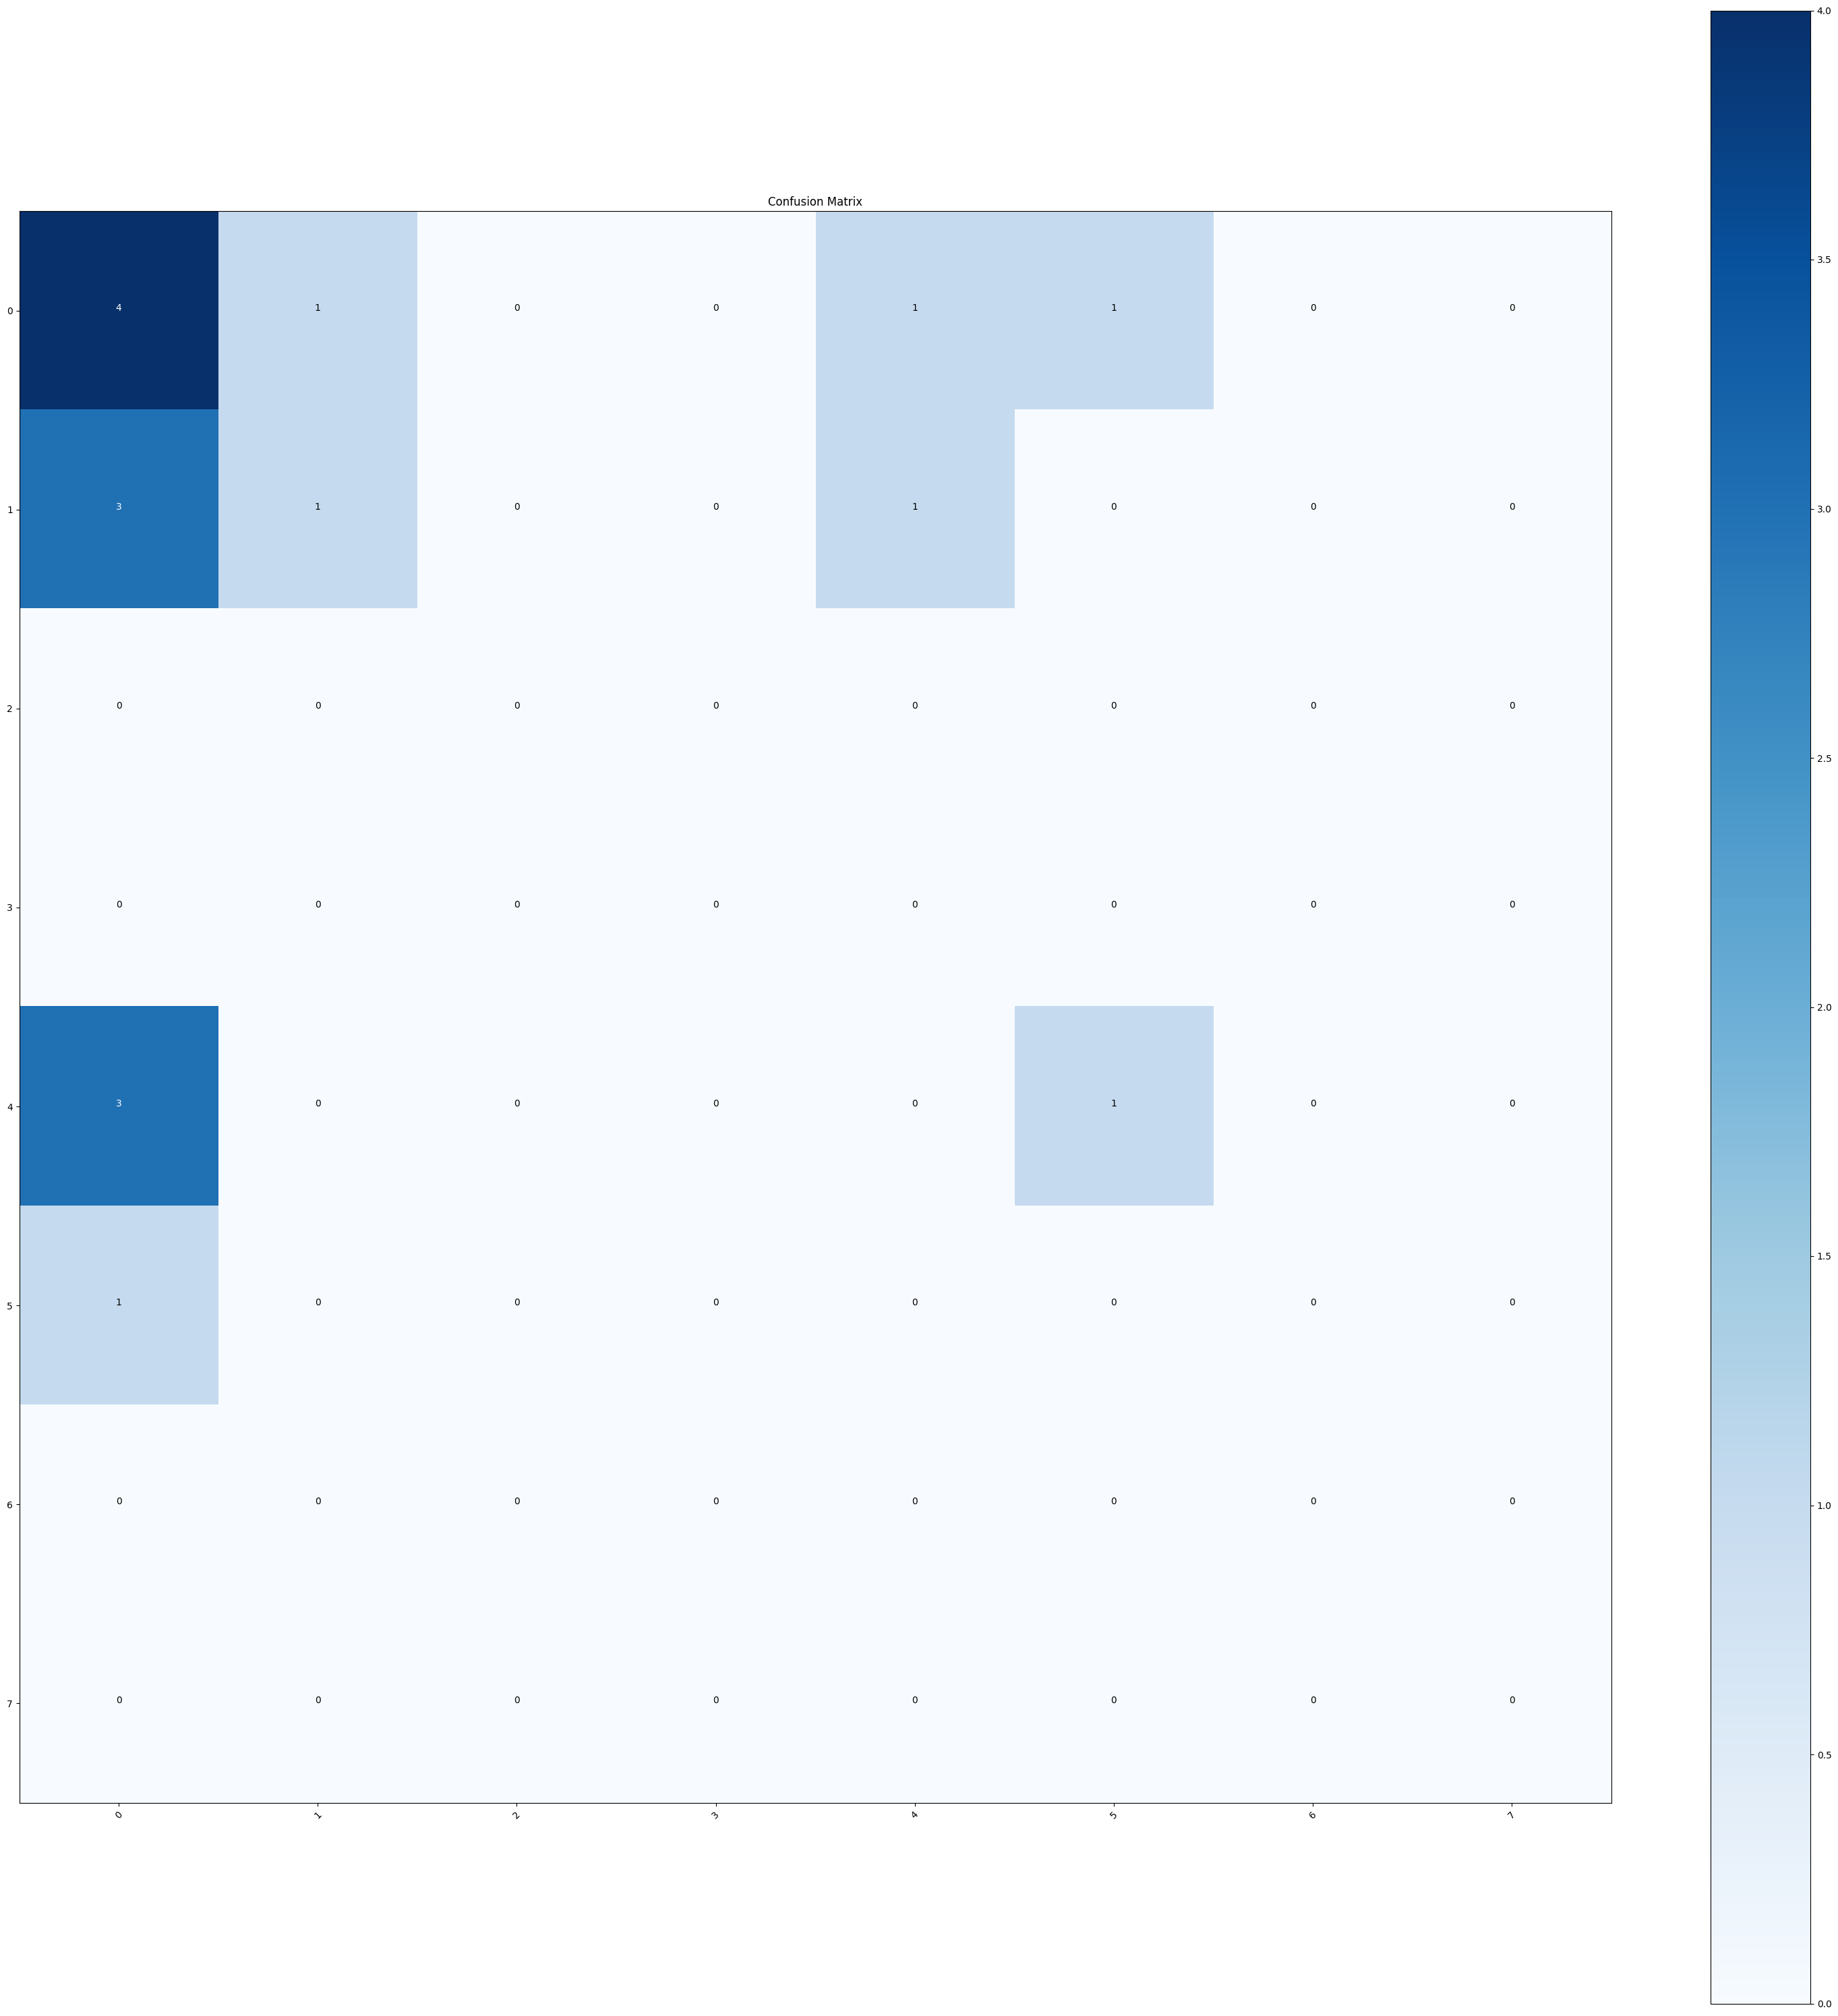

In [165]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    
    cm = np.log(cm+1)
    cm = cm.astype("int32")

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(30,30))
    #plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.savefig("plot/SVM.png")
    plt.show()


classes = list(range(8))

dic = {}
for i in range(len(classes)):
    dic[classes[i]] = i

cnf_array = []
for i in range(len(classes)):
    cnf_array.append([0]*len(classes))

for i in range(res.shape[0]):
    cnf_array[y_test[0][i]][res[i]]+=1

print(cnf_array)

plot_confusion_matrix(cm= np.array(cnf_array), 
                      normalize    = False,
                      target_names = classes,
                      title        = "Confusion Matrix")